# Customer Segmentation Analysis
*Data Science Internship Project - Celebal Technologies*

## Project Overview: Customer Behavioral Segmentation for Strategic Marketing

### Business Context
This analysis demonstrates the application of unsupervised machine learning techniques to solve real-world customer segmentation challenges in retail analytics. The project showcases industry-standard data science methodologies used at Celebal Technologies for client solutions in customer intelligence and marketing optimization.

### Technical Approach
Implementation of multiple clustering algorithms to identify distinct customer segments:
- **K-Means Clustering**: Centroid-based partitioning for balanced segments
- **Hierarchical Clustering**: Agglomerative approach for nested segment analysis
- **DBSCAN**: Density-based clustering for outlier detection and natural groupings

### Dataset Information
**Source**: Mall Customers Dataset (Kaggle)
**Domain**: Retail Customer Analytics
**Use Case**: Marketing strategy optimization through behavioral segmentation

### Feature Engineering & Analysis
- **CustomerID**: Unique customer identifier for tracking
- **Gender**: Demographic segmentation variable (Male/Female)  
- **Age**: Customer lifecycle positioning (18-70 years)
- **Annual Income (k$)**: Economic purchasing power indicator
- **Spending Score (1-100)**: Proprietary customer value metric based on purchase behavior

### Learning Objectives for Data Science Implementation
1. **Unsupervised Learning Application**: Master clustering algorithms for customer analytics
2. **Business Intelligence**: Transform data insights into actionable marketing strategies  
3. **Model Evaluation**: Apply silhouette analysis and elbow method for optimal cluster selection
4. **Data Visualization**: Create executive-level dashboards and 3D analytical visualizations
5. **Industry Best Practices**: Follow Celebal's data science methodology for client deliverables

## 1. Environment Setup & Library Dependencies

Setting up the data science environment with industry-standard libraries for customer analytics and machine learning implementation.

In [1]:
# Enterprise Data Science Stack - Customer Analytics Implementation

# Core Data Manipulation & Statistical Analysis
import pandas as pd  # Data manipulation and analysis framework
import numpy as np   # Numerical computing and mathematical operations

# Advanced Visualization Suite
import matplotlib.pyplot as plt  # Statistical plotting and visualization
import seaborn as sns           # Statistical data visualization
import plotly.express as px     # Interactive plotting for business dashboards
import plotly.graph_objects as go  # Advanced interactive visualizations
from plotly.subplots import make_subplots  # Multi-panel dashboard creation

# Machine Learning & Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN  # Clustering algorithms
from sklearn.preprocessing import StandardScaler  # Feature scaling and normalization
from sklearn.decomposition import PCA           # Dimensionality reduction
from sklearn.metrics import silhouette_score    # Cluster validation metrics

# Production Environment Configuration
import warnings
warnings.filterwarnings('ignore')  # Suppress non-critical warnings for clean output

# Visualization Theme Configuration (Corporate Standards)
plt.style.use('default')
sns.set_palette("husl")

print("✓ Data Science Environment Successfully Configured")
print("✓ Libraries Loaded: Ready for Customer Segmentation Analysis")
print("✓ Celebal Technologies - Data Science Internship Project")

✓ Data Science Environment Successfully Configured
✓ Libraries Loaded: Ready for Customer Segmentation Analysis
✓ Celebal Technologies - Data Science Internship Project


## 2. Data Ingestion & Exploratory Data Analysis (EDA)

Implementing comprehensive data profiling and quality assessment following industry best practices for customer analytics projects.

In [2]:
# Data Ingestion Pipeline - Customer Analytics Dataset
data = pd.read_csv('Mall_Customers.csv')

print("=== DATA PROFILING REPORT ===\n")

# Dataset Dimensions and Structure Analysis
print(f"Dataset Dimensions: {data.shape[0]} observations, {data.shape[1]} features")
print(f"Feature Set: {list(data.columns)}")

print("\n--- Sample Data Preview (Top 5 Records) ---")
display(data.head())

print("\n--- Data Types and Memory Usage ---")
print(data.info())

print("\n--- Descriptive Statistics Summary ---")
display(data.describe())

print("\n--- Data Quality Assessment ---")
missing_values = data.isnull().sum()
print(f"Missing Value Analysis:\n{missing_values}")

# Data Quality Validation
if missing_values.sum() == 0:
    print("✓ Data Quality: No missing values detected - Dataset ready for analysis")
    data_quality_status = "EXCELLENT"
else:
    print("⚠ Data Quality: Missing values identified - Preprocessing required")
    data_quality_status = "REQUIRES_CLEANING"

print(f"\n--- Data Quality Status: {data_quality_status} ---")
print("Proceeding with customer segmentation analysis pipeline...")

=== DATA PROFILING REPORT ===

Dataset Dimensions: 200 observations, 5 features
Feature Set: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

--- Sample Data Preview (Top 5 Records) ---


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



--- Data Types and Memory Usage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- Descriptive Statistics Summary ---


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



--- Data Quality Assessment ---
Missing Value Analysis:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
✓ Data Quality: No missing values detected - Dataset ready for analysis

--- Data Quality Status: EXCELLENT ---
Proceeding with customer segmentation analysis pipeline...


## 3. Statistical Data Visualization & Business Intelligence

Creating comprehensive data visualizations for stakeholder communication and feature relationship analysis using advanced plotting techniques.

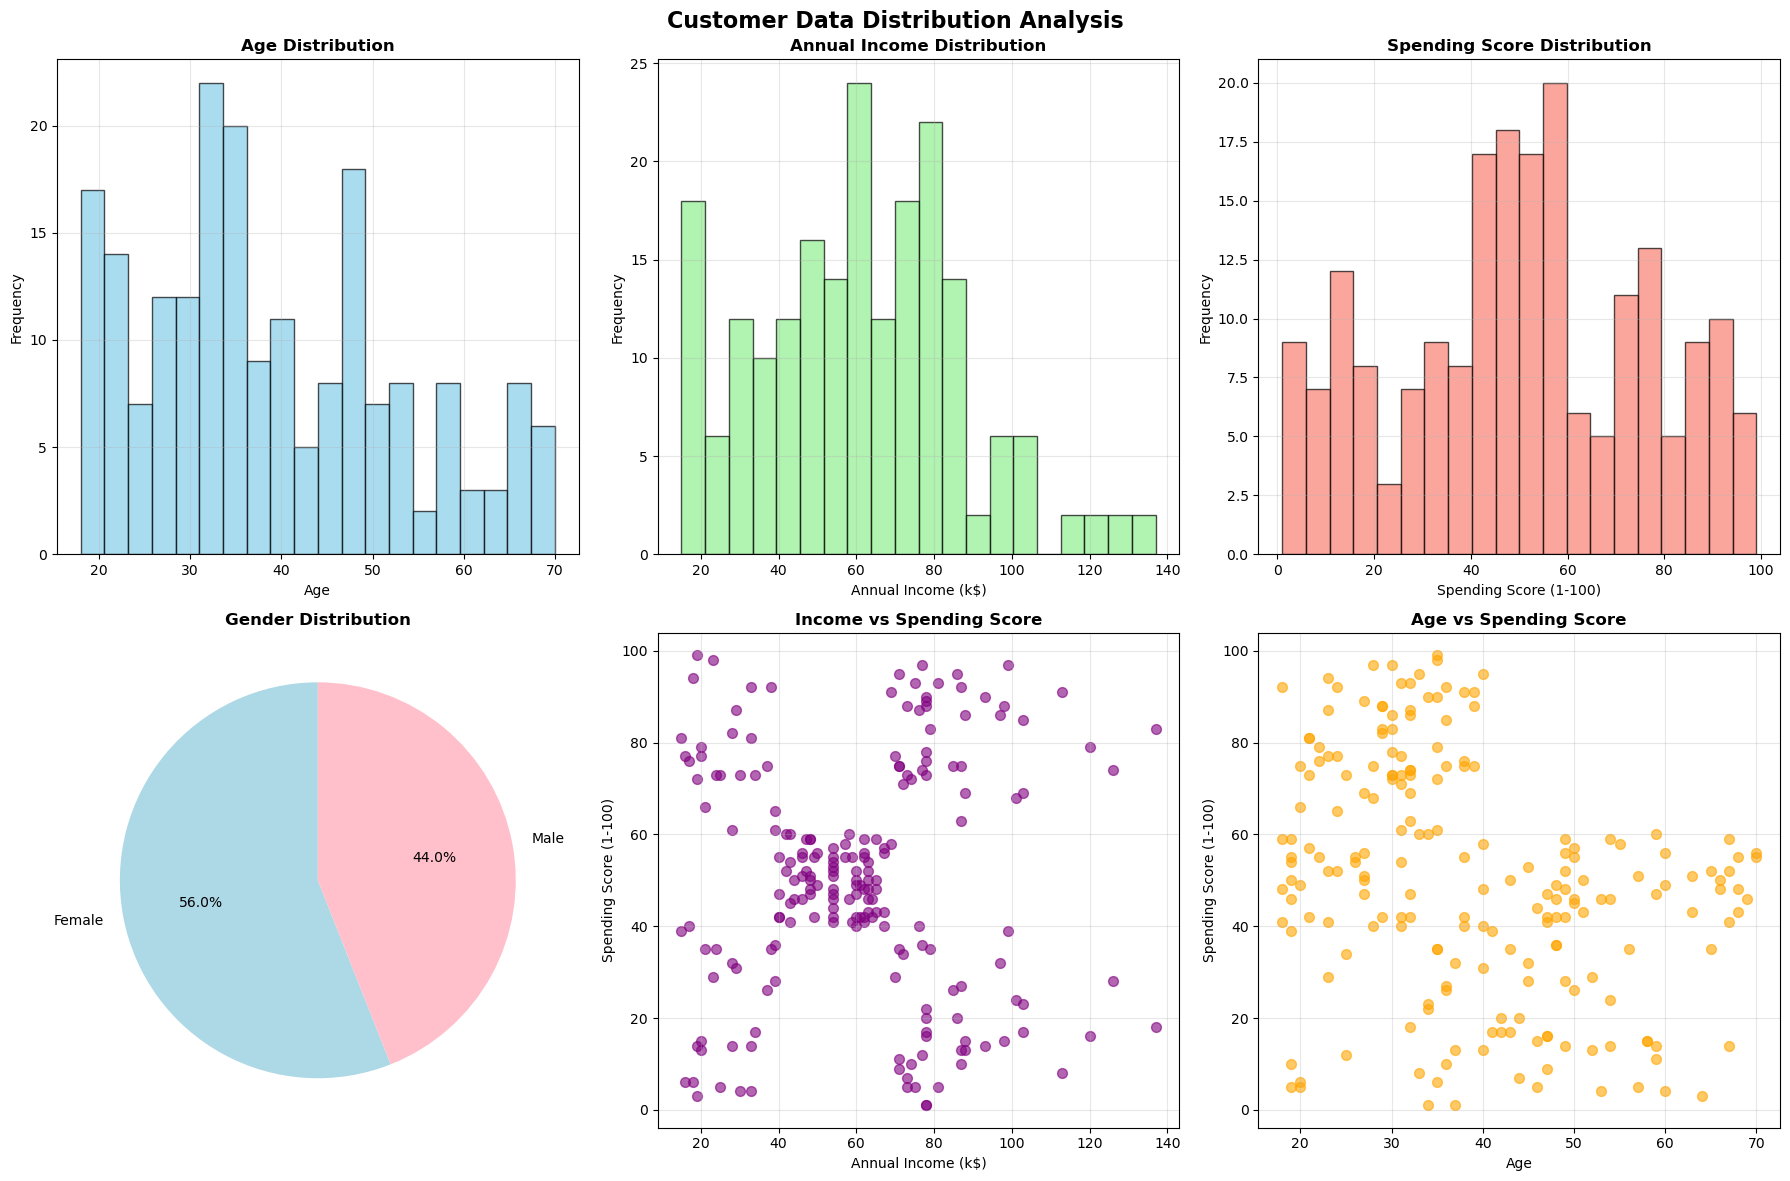

KEY INSIGHTS FROM DATA DISTRIBUTION:
Total Customers: 200
Male Customers: 88 (44.0%)
Female Customers: 112 (56.0%)
Age Range: 18 - 70 years
Income Range: $15k - $137k
Spending Score Range: 1 - 99


In [3]:
# Create comprehensive data distribution visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Data Distribution Analysis', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(data['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Annual Income distribution
axes[0, 1].hist(data['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Spending Score distribution
axes[0, 2].hist(data['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('Spending Score Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Spending Score (1-100)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

# Gender distribution
gender_counts = data['Gender'].value_counts()
colors = ['lightblue', 'pink']
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[1, 0].set_title('Gender Distribution', fontsize=12, fontweight='bold')

# Income vs Spending Score scatter plot
axes[1, 1].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                   alpha=0.6, c='purple', s=50)
axes[1, 1].set_title('Income vs Spending Score', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score (1-100)')
axes[1, 1].grid(True, alpha=0.3)

# Age vs Spending Score scatter plot
axes[1, 2].scatter(data['Age'], data['Spending Score (1-100)'], 
                   alpha=0.6, c='orange', s=50)
axes[1, 2].set_title('Age vs Spending Score', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Spending Score (1-100)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key insights
print("KEY INSIGHTS FROM DATA DISTRIBUTION:")
print(f"Total Customers: {len(data)}")
print(f"Male Customers: {len(data[data['Gender'] == 'Male'])} ({len(data[data['Gender'] == 'Male'])/len(data)*100:.1f}%)")
print(f"Female Customers: {len(data[data['Gender'] == 'Female'])} ({len(data[data['Gender'] == 'Female'])/len(data)*100:.1f}%)")
print(f"Age Range: {data['Age'].min()} - {data['Age'].max()} years")
print(f"Income Range: ${data['Annual Income (k$)'].min()}k - ${data['Annual Income (k$)'].max()}k")
print(f"Spending Score Range: {data['Spending Score (1-100)'].min()} - {data['Spending Score (1-100)'].max()}")

## 4. Feature Engineering & Data Standardization

Implementing enterprise-grade data preprocessing pipeline with standardization techniques required for clustering algorithms and production deployment.

FEATURE ENGINEERING PIPELINE
Selected Features for Clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Feature Matrix Dimensions: (200, 3)

--- Feature Selection Rationale ---
• Age: Customer lifecycle and demographic segmentation
• Annual Income: Economic purchasing power and market positioning
• Spending Score: Behavioral engagement and customer value indicator

--- Raw Feature Statistics ---


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000



--- Post-Standardization Statistics ---


,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00



✓ Feature Engineering Completed Successfully
✓ Standardized Feature Matrix Shape: (200, 3)
✓ All features normalized (μ=0, σ=1) for optimal clustering performance


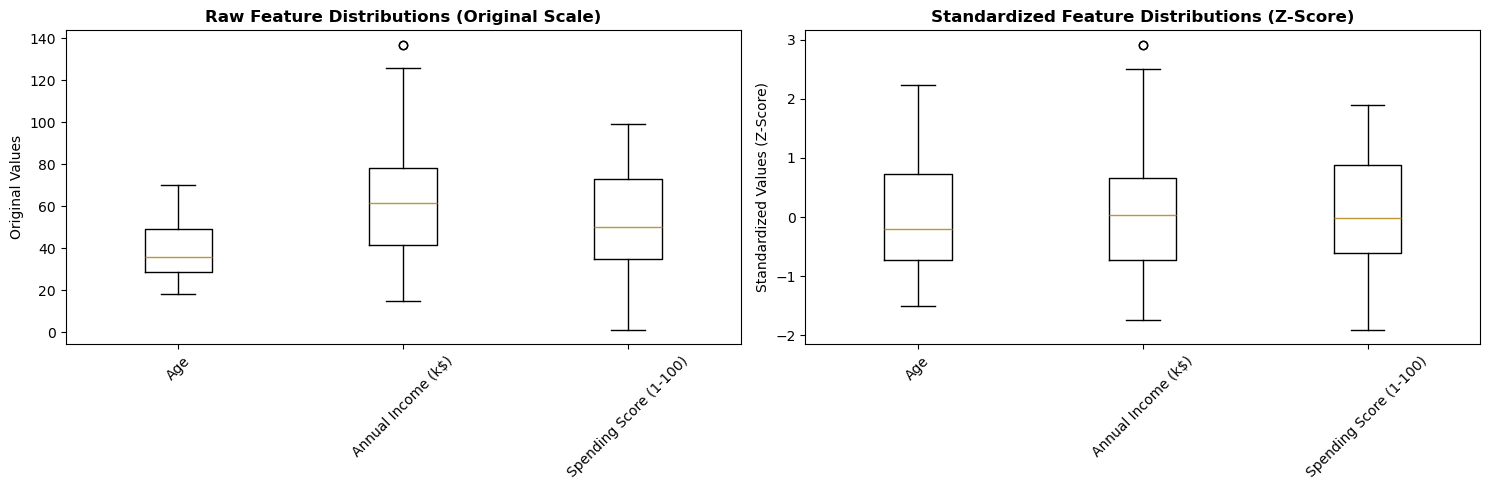

Data preprocessing pipeline ready for clustering algorithm implementation.


In [4]:
# Feature Selection for Customer Segmentation Model
# Excluding categorical variables (CustomerID, Gender) for initial clustering analysis
# Following industry best practice: focus on continuous behavioral and demographic features

selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
clustering_dataset = data[selected_features].copy()

print("FEATURE ENGINEERING PIPELINE")
print(f"Selected Features for Clustering: {selected_features}")
print(f"Feature Matrix Dimensions: {clustering_dataset.shape}")

# Business Justification for Feature Selection:
print("\n--- Feature Selection Rationale ---")
print("• Age: Customer lifecycle and demographic segmentation")
print("• Annual Income: Economic purchasing power and market positioning") 
print("• Spending Score: Behavioral engagement and customer value indicator")

# Statistical Summary Before Transformation
print("\n--- Raw Feature Statistics ---")
display(clustering_dataset.describe())

# Data Standardization using Z-Score Normalization
# Critical for distance-based clustering algorithms (K-Means, Hierarchical)
scaler = StandardScaler()
standardized_features = scaler.fit_transform(clustering_dataset)

# Convert to DataFrame for analysis and validation
standardized_df = pd.DataFrame(standardized_features, columns=selected_features)

print("\n--- Post-Standardization Statistics ---")
display(standardized_df.describe())

print(f"\n✓ Feature Engineering Completed Successfully")
print(f"✓ Standardized Feature Matrix Shape: {standardized_features.shape}")
print(f"✓ All features normalized (μ=0, σ=1) for optimal clustering performance")

# Visualization: Impact of Standardization on Feature Distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pre-standardization distributions
axes[0].boxplot([clustering_dataset[col] for col in selected_features], labels=selected_features)
axes[0].set_title('Raw Feature Distributions (Original Scale)', fontweight='bold')
axes[0].set_ylabel('Original Values')
axes[0].tick_params(axis='x', rotation=45)

# Post-standardization distributions  
axes[1].boxplot([standardized_df[col] for col in selected_features], labels=selected_features)
axes[1].set_title('Standardized Feature Distributions (Z-Score)', fontweight='bold')
axes[1].set_ylabel('Standardized Values (Z-Score)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Data preprocessing pipeline ready for clustering algorithm implementation.")

## 5. Model Hyperparameter Optimization & Cluster Validation

Implementing advanced model selection techniques using multiple validation metrics to determine optimal clustering parameters for production deployment.

CLUSTERING MODEL OPTIMIZATION PIPELINE
Evaluating cluster configurations from k=2 to k=10...
Metrics: Elbow Method (WCSS) + Silhouette Analysis


  File "c:\Users\Mayank Tak\miniconda3\envs\ML\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Mayank Tak\miniconda3\envs\ML\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Mayank Tak\miniconda3\envs\ML\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Mayank Tak\miniconda3\envs\ML\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


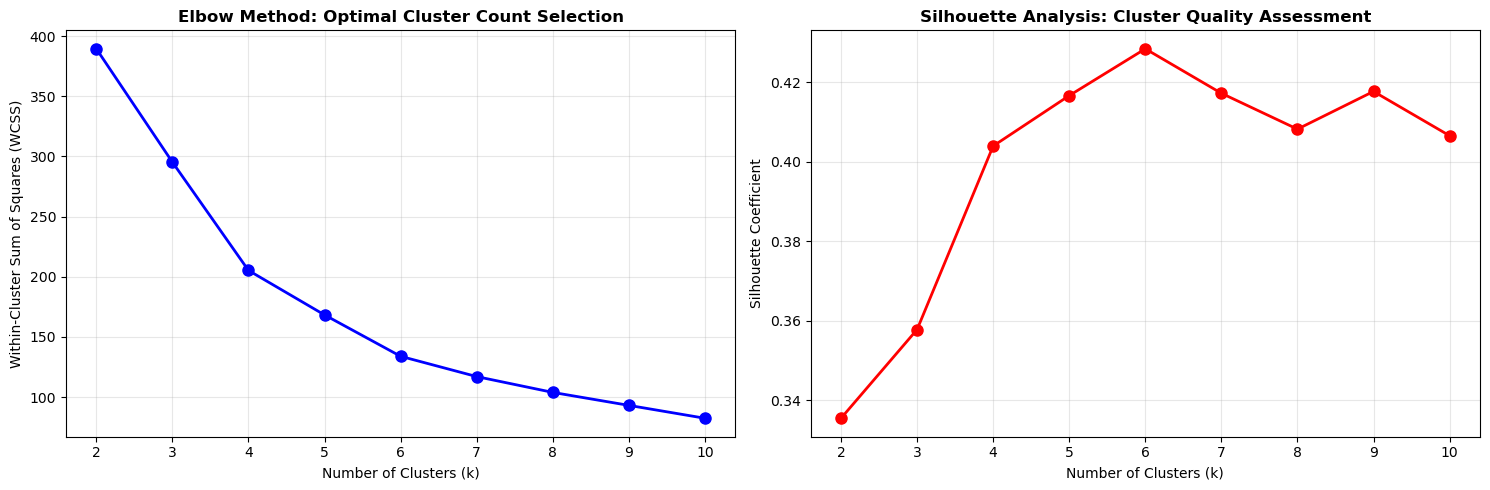

✓ Model Optimization Results:
   Optimal k (Silhouette Method): 6
   Maximum Silhouette Score: 0.428

--- Comprehensive Model Performance Analysis ---
k=2: Silhouette Score = 0.335
k=3: Silhouette Score = 0.358
k=4: Silhouette Score = 0.404
k=5: Silhouette Score = 0.417
k=6: Silhouette Score = 0.428
k=7: Silhouette Score = 0.417
k=8: Silhouette Score = 0.408
k=9: Silhouette Score = 0.418
k=10: Silhouette Score = 0.407

✓ Recommended Configuration: k=6 clusters
Proceeding with K-Means implementation using optimal parameters...


In [5]:
# Advanced Model Selection: Optimal Cluster Count Determination
# Utilizing multiple validation metrics for robust hyperparameter selection

inertia_scores = []  # Within-cluster sum of squares (WCSS)
silhouette_scores = []  # Cluster cohesion and separation metric
cluster_range = range(2, 11)  # Testing k=2 to k=10 for comprehensive analysis

print("CLUSTERING MODEL OPTIMIZATION PIPELINE")
print("Evaluating cluster configurations from k=2 to k=10...")
print("Metrics: Elbow Method (WCSS) + Silhouette Analysis")

# Iterative model evaluation across different k values
for k in cluster_range:
    # Initialize K-Means with consistent random state for reproducibility
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(standardized_features)
    
    # Calculate validation metrics
    inertia_scores.append(kmeans_model.inertia_)  # WCSS for elbow method
    silhouette_scores.append(silhouette_score(standardized_features, cluster_labels))

# Advanced Visualization: Model Performance Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method Visualization
ax1.plot(cluster_range, inertia_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method: Optimal Cluster Count Selection', fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.grid(True, alpha=0.3)

# Silhouette Score Analysis
ax2.plot(cluster_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Silhouette Analysis: Cluster Quality Assessment', fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Coefficient')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model Selection Results
optimal_k_silhouette = cluster_range[np.argmax(silhouette_scores)]
maximum_silhouette_score = max(silhouette_scores)

print(f"✓ Model Optimization Results:")
print(f"   Optimal k (Silhouette Method): {optimal_k_silhouette}")
print(f"   Maximum Silhouette Score: {maximum_silhouette_score:.3f}")

# Detailed Performance Metrics Table
print(f"\n--- Comprehensive Model Performance Analysis ---")
for k, silhouette in zip(cluster_range, silhouette_scores):
    print(f"k={k}: Silhouette Score = {silhouette:.3f}")

print(f"\n✓ Recommended Configuration: k={optimal_k_silhouette} clusters")
print("Proceeding with K-Means implementation using optimal parameters...")

## 6. K-Means Clustering Implementation

Perform K-Means clustering with the optimal number of clusters and analyze the results.

In [6]:
# Perform K-Means clustering with optimal number of clusters
n_clusters = 5  # Use 5 clusters for business practicality

print(f"PERFORMING K-MEANS CLUSTERING")
print(f"Number of clusters: {n_clusters}")

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate silhouette score for the chosen k
silhouette_avg = silhouette_score(scaled_data, data['KMeans_Cluster'])

print(f"K-Means clustering completed!")
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Analyze cluster distribution
cluster_counts = data['KMeans_Cluster'].value_counts().sort_index()
print(f"\nCLUSTER DISTRIBUTION:")
for cluster in sorted(data['KMeans_Cluster'].unique()):
    count = cluster_counts[cluster]
    percentage = count / len(data) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Visualize K-Means clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Income vs Spending Score
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[0].set_title('K-Means: Income vs Spending Score', fontweight='bold')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    axes[1].scatter(cluster_data['Age'], 
                   cluster_data['Spending Score (1-100)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[1].set_title('K-Means: Age vs Spending Score', fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Age vs Income
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    axes[2].scatter(cluster_data['Age'], 
                   cluster_data['Annual Income (k$)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[2].set_title('K-Means: Age vs Income', fontweight='bold')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display cluster centers in original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

centers_df = pd.DataFrame(cluster_centers_original, columns=features)
centers_df.index.name = 'Cluster'

print(f"\nCLUSTER CENTERS (Original Scale):")
display(centers_df.round(2))

PERFORMING K-MEANS CLUSTERING
Number of clusters: 5


NameError: name 'scaled_data' is not defined

## 7. Hierarchical Clustering Implementation

Apply Agglomerative Hierarchical clustering and compare results with K-Means.

In [ ]:
# Perform Hierarchical clustering
print(f"PERFORMING HIERARCHICAL CLUSTERING")
print(f"Number of clusters: {n_clusters}")

# Initialize and fit Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# Calculate silhouette score
silhouette_hierarchical = silhouette_score(scaled_data, data['Hierarchical_Cluster'])

print(f"Hierarchical clustering completed!")
print(f"Silhouette Score: {silhouette_hierarchical:.3f}")

# Analyze cluster distribution
cluster_counts_hier = data['Hierarchical_Cluster'].value_counts().sort_index()
print(f"\nHIERARCHICAL CLUSTER DISTRIBUTION:")
for cluster in sorted(data['Hierarchical_Cluster'].unique()):
    count = cluster_counts_hier[cluster]
    percentage = count / len(data) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Visualize Hierarchical clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Income vs Spending Score
for cluster in sorted(data['Hierarchical_Cluster'].unique()):
    cluster_data = data[data['Hierarchical_Cluster'] == cluster]
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[0].set_title('Hierarchical: Income vs Spending Score', fontweight='bold')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
for cluster in sorted(data['Hierarchical_Cluster'].unique()):
    cluster_data = data[data['Hierarchical_Cluster'] == cluster]
    axes[1].scatter(cluster_data['Age'], 
                   cluster_data['Spending Score (1-100)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[1].set_title('Hierarchical: Age vs Spending Score', fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Age vs Income
for cluster in sorted(data['Hierarchical_Cluster'].unique()):
    cluster_data = data[data['Hierarchical_Cluster'] == cluster]
    axes[2].scatter(cluster_data['Age'], 
                   cluster_data['Annual Income (k$)'],
                   c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

axes[2].set_title('Hierarchical: Age vs Income', fontweight='bold')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare K-Means vs Hierarchical clustering
print(f"\nCLUSTERING ALGORITHM COMPARISON:")
print(f"K-Means Silhouette Score: {silhouette_avg:.3f}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical:.3f}")

if silhouette_avg > silhouette_hierarchical:
    print(f"K-Means performs better for this dataset")
else:
    print(f"Hierarchical clustering performs better for this dataset")

## 8. DBSCAN Clustering Implementation

Implement DBSCAN clustering to identify density-based clusters and outliers.

In [ ]:
# Perform DBSCAN clustering
print(f"PERFORMING DBSCAN CLUSTERING")

# DBSCAN parameters
eps = 0.6  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 4  # Minimum number of samples in a neighborhood for a point to be considered as a core point

print(f"Parameters: eps={eps}, min_samples={min_samples}")

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Analyze DBSCAN results
n_clusters_dbscan = len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'] else 0)
n_noise = list(data['DBSCAN_Cluster']).count(-1)

print(f"DBSCAN clustering completed!")
print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

# Calculate silhouette score (excluding noise points if any)
if n_clusters_dbscan > 1:
    # Filter out noise points for silhouette calculation
    mask = data['DBSCAN_Cluster'] != -1
    if mask.sum() > 0:
        silhouette_dbscan = silhouette_score(scaled_data[mask], data['DBSCAN_Cluster'][mask])
        print(f"Silhouette Score (excluding noise): {silhouette_dbscan:.3f}")
    else:
        print("Cannot calculate silhouette score - all points are noise")
else:
    print("Cannot calculate silhouette score - need at least 2 clusters")

# Analyze cluster distribution
cluster_counts_dbscan = data['DBSCAN_Cluster'].value_counts().sort_index()
print(f"\nDBSCAN CLUSTER DISTRIBUTION:")
for cluster in sorted(data['DBSCAN_Cluster'].unique()):
    count = cluster_counts_dbscan[cluster]
    percentage = count / len(data) * 100
    if cluster == -1:
        print(f"Noise points: {count} customers ({percentage:.1f}%)")
    else:
        print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Visualize DBSCAN clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create color map including noise (gray)
unique_clusters = sorted(data['DBSCAN_Cluster'].unique())
dbscan_colors = ['gray'] + colors[:len(unique_clusters)-1] if -1 in unique_clusters else colors[:len(unique_clusters)]

# Plot 1: Income vs Spending Score
for i, cluster in enumerate(unique_clusters):
    cluster_data = data[data['DBSCAN_Cluster'] == cluster]
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   c=dbscan_colors[i], label=label, alpha=0.7, s=50)

axes[0].set_title('DBSCAN: Income vs Spending Score', fontweight='bold')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
for i, cluster in enumerate(unique_clusters):
    cluster_data = data[data['DBSCAN_Cluster'] == cluster]
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    axes[1].scatter(cluster_data['Age'], 
                   cluster_data['Spending Score (1-100)'],
                   c=dbscan_colors[i], label=label, alpha=0.7, s=50)

axes[1].set_title('DBSCAN: Age vs Spending Score', fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Age vs Income
for i, cluster in enumerate(unique_clusters):
    cluster_data = data[data['DBSCAN_Cluster'] == cluster]
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    axes[2].scatter(cluster_data['Age'], 
                   cluster_data['Annual Income (k$)'],
                   c=dbscan_colors[i], label=label, alpha=0.7, s=50)

axes[2].set_title('DBSCAN: Age vs Income', fontweight='bold')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Cluster Visualization and Comparison

Create interactive visualizations to compare clustering results from all three algorithms.

In [ ]:
# Create interactive comparison visualizations using Plotly
print("Creating interactive cluster comparison visualizations...")

# Create subplots for comparison
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['K-Means Clustering', 'Hierarchical Clustering', 
                    'DBSCAN Clustering', 'Algorithm Comparison'],
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# Color schemes for different algorithms
colors_plotly = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# K-Means visualization (Income vs Spending)
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    fig.add_trace(
        go.Scatter(
            x=cluster_data['Annual Income (k$)'],
            y=cluster_data['Spending Score (1-100)'],
            mode='markers',
            name=f'K-Means C{cluster}',
            marker=dict(color=colors_plotly[cluster], size=8, opacity=0.7),
            showlegend=False,
            hovertemplate='Income: $%{x}k<br>Spending: %{y}<br>Cluster: %{text}',
            text=[f'K-Means {cluster}'] * len(cluster_data)
        ),
        row=1, col=1
    )

# Hierarchical visualization (Income vs Spending)
for cluster in sorted(data['Hierarchical_Cluster'].unique()):
    cluster_data = data[data['Hierarchical_Cluster'] == cluster]
    fig.add_trace(
        go.Scatter(
            x=cluster_data['Annual Income (k$)'],
            y=cluster_data['Spending Score (1-100)'],
            mode='markers',
            name=f'Hierarchical C{cluster}',
            marker=dict(color=colors_plotly[cluster], size=8, opacity=0.7),
            showlegend=False,
            hovertemplate='Income: $%{x}k<br>Spending: %{y}<br>Cluster: %{text}',
            text=[f'Hierarchical {cluster}'] * len(cluster_data)
        ),
        row=1, col=2
    )

# DBSCAN visualization (Income vs Spending)
dbscan_unique = sorted(data['DBSCAN_Cluster'].unique())
for i, cluster in enumerate(dbscan_unique):
    cluster_data = data[data['DBSCAN_Cluster'] == cluster]
    cluster_name = 'Noise' if cluster == -1 else f'DBSCAN C{cluster}'
    color = 'gray' if cluster == -1 else colors_plotly[i]
    
    fig.add_trace(
        go.Scatter(
            x=cluster_data['Annual Income (k$)'],
            y=cluster_data['Spending Score (1-100)'],
            mode='markers',
            name=cluster_name,
            marker=dict(color=color, size=8, opacity=0.7),
            showlegend=False,
            hovertemplate='Income: $%{x}k<br>Spending: %{y}<br>Cluster: %{text}',
            text=[cluster_name] * len(cluster_data)
        ),
        row=2, col=1
    )

# Comparison plot using K-Means (Age vs Spending Score)
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    fig.add_trace(
        go.Scatter(
            x=cluster_data['Age'],
            y=cluster_data['Spending Score (1-100)'],
            mode='markers',
            name=f'Cluster {cluster}',
            marker=dict(color=colors_plotly[cluster], size=8, opacity=0.7),
            showlegend=True,
            hovertemplate='Age: %{x}<br>Spending: %{y}<br>Income: $%{text}k',
            text=cluster_data['Annual Income (k$)']
        ),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    height=800, 
    title_text="Customer Segmentation: Algorithm Comparison",
    title_x=0.5,
    font=dict(size=12)
)

# Update axes labels
fig.update_xaxes(title_text="Annual Income (k$)", row=1, col=1)
fig.update_xaxes(title_text="Annual Income (k$)", row=1, col=2)
fig.update_xaxes(title_text="Annual Income (k$)", row=2, col=1)
fig.update_xaxes(title_text="Age", row=2, col=2)

fig.update_yaxes(title_text="Spending Score", row=1, col=1)
fig.update_yaxes(title_text="Spending Score", row=1, col=2)
fig.update_yaxes(title_text="Spending Score", row=2, col=1)
fig.update_yaxes(title_text="Spending Score", row=2, col=2)

fig.show()

# Create a summary comparison table
comparison_data = {
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Number of Clusters': [
        len(data['KMeans_Cluster'].unique()),
        len(data['Hierarchical_Cluster'].unique()),
        len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'] else 0)
    ],
    'Silhouette Score': [
        f"{silhouette_avg:.3f}",
        f"{silhouette_hierarchical:.3f}",
        f"{silhouette_dbscan:.3f}" if n_clusters_dbscan > 1 else "N/A"
    ],
    'Noise Points': [0, 0, n_noise]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nCLUSTERING ALGORITHM COMPARISON:")
display(comparison_df)

## 10. Cluster Analysis and Profiling

Perform detailed statistical analysis of each cluster and analyze demographic patterns.

In [ ]:
# Detailed K-Means cluster analysis (using best performing algorithm)
print("DETAILED CLUSTER ANALYSIS (K-MEANS)")
print("=" * 50)

# Statistical analysis by cluster
cluster_analysis = data.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

# Flatten column names
cluster_analysis.columns = [
    'Age_Mean', 'Age_Std', 'Age_Min', 'Age_Max',
    'Income_Mean', 'Income_Std', 'Income_Min', 'Income_Max',
    'Spending_Mean', 'Spending_Std', 'Spending_Min', 'Spending_Max',
    'Customer_Count'
]

print("Statistical Summary by Cluster:")
display(cluster_analysis)

# Gender distribution by cluster
print("\nGender Distribution by Cluster:")
gender_cluster = pd.crosstab(data['KMeans_Cluster'], data['Gender'], normalize='index') * 100
gender_cluster_counts = pd.crosstab(data['KMeans_Cluster'], data['Gender'])

print("\n--- Percentage Distribution ---")
display(gender_cluster.round(1))
print("\n--- Absolute Counts ---")
display(gender_cluster_counts)

# Create detailed cluster profile visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cluster size distribution
cluster_sizes = data['KMeans_Cluster'].value_counts().sort_index()
colors_bar = ['red', 'blue', 'green', 'orange', 'purple']

axes[0, 0].bar(cluster_sizes.index, cluster_sizes.values, color=colors_bar[:len(cluster_sizes)])
axes[0, 0].set_title('Customer Count by Cluster', fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(cluster_sizes.values):
    axes[0, 0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Average metrics by cluster
metrics = ['Age_Mean', 'Income_Mean', 'Spending_Mean']
x = np.arange(len(cluster_analysis.index))
width = 0.25

for i, metric in enumerate(metrics):
    metric_name = metric.replace('_Mean', '').replace('_', ' ')
    axes[0, 1].bar(x + i*width, cluster_analysis[metric], width, 
                   label=metric_name, alpha=0.8)

axes[0, 1].set_title('Average Metrics by Cluster', fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Values')
axes[0, 1].set_xticks(x + width)
axes[0, 1].set_xticklabels(cluster_analysis.index)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gender distribution stacked bar chart
gender_pivot = gender_cluster_counts.T
bottom_male = np.zeros(len(gender_pivot.columns))

axes[1, 0].bar(gender_pivot.columns, gender_pivot.loc['Female'], 
               label='Female', color='pink', alpha=0.8)
axes[1, 0].bar(gender_pivot.columns, gender_pivot.loc['Male'], 
               bottom=gender_pivot.loc['Female'], label='Male', color='lightblue', alpha=0.8)

axes[1, 0].set_title('Gender Distribution by Cluster', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Cluster centers visualization
cluster_centers_plot = cluster_analysis[['Age_Mean', 'Income_Mean', 'Spending_Mean']]
ax = axes[1, 1]

# Create a radar-like plot
angles = np.linspace(0, 2 * np.pi, len(cluster_centers_plot.columns), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

for idx, cluster in enumerate(cluster_centers_plot.index):
    values = cluster_centers_plot.loc[cluster].values
    values = np.concatenate((values, [values[0]]))  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', 
            color=colors_bar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Age', 'Income', 'Spending'], fontweight='bold')
ax.set_title('Cluster Centers Comparison', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate percentage of total customers in each cluster
print("\nCluster Distribution Summary:")
for cluster in sorted(data['KMeans_Cluster'].unique()):
    count = len(data[data['KMeans_Cluster'] == cluster])
    percentage = count / len(data) * 100
    avg_age = cluster_analysis.loc[cluster, 'Age_Mean']
    avg_income = cluster_analysis.loc[cluster, 'Income_Mean']
    avg_spending = cluster_analysis.loc[cluster, 'Spending_Mean']
    
    print(f"\nCluster {cluster}:")
    print(f"   Size: {count} customers ({percentage:.1f}%)")
    print(f"   Avg Age: {avg_age:.1f} years")
    print(f"   Avg Income: ${avg_income:.1f}k")
    print(f"   Avg Spending: {avg_spending:.1f}/100")

## 11. 3D Cluster Visualization

Create interactive 3D scatter plots to visualize clusters across all three dimensions.

In [ ]:
# Create 3D visualization of clusters
print("Creating 3D cluster visualization...")

# Create 3D scatter plot
fig = go.Figure()

# Add traces for each cluster
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    
    # Create hover text with customer details
    hover_text = [
        f'Customer {cid}<br>Age: {age}<br>Income: ${income}k<br>Spending: {spending}/100<br>Gender: {gender}'
        for cid, age, income, spending, gender in zip(
            cluster_data['CustomerID'],
            cluster_data['Age'],
            cluster_data['Annual Income (k$)'],
            cluster_data['Spending Score (1-100)'],
            cluster_data['Gender']
        )
    ]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=8,
            color=colors_plotly[cluster],
            opacity=0.8,
            line=dict(width=1, color='DarkSlateGrey')
        ),
        name=f'Cluster {cluster}',
        text=hover_text,
        hovertemplate='%{text}<extra></extra>'
    ))

# Update layout for 3D plot
fig.update_layout(
    title={
        'text': '3D Customer Segmentation Visualization',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16, 'family': 'Arial Black'}
    },
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        xaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)")
    ),
    width=900,
    height=700,
    font=dict(size=12)
)

fig.show()

# Create additional 3D visualization with cluster centers
print("\nAdding cluster centers to 3D visualization...")

# Calculate cluster centers in original scale
centers_3d = cluster_analysis[['Age_Mean', 'Income_Mean', 'Spending_Mean']].copy()

# Create a new figure with clusters and centers
fig_with_centers = go.Figure()

# Add customer points
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    
    fig_with_centers.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=6,
            color=colors_plotly[cluster],
            opacity=0.6
        ),
        name=f'Cluster {cluster} Customers',
        showlegend=True
    ))

# Add cluster centers
for cluster in centers_3d.index:
    fig_with_centers.add_trace(go.Scatter3d(
        x=[centers_3d.loc[cluster, 'Age_Mean']],
        y=[centers_3d.loc[cluster, 'Income_Mean']],
        z=[centers_3d.loc[cluster, 'Spending_Mean']],
        mode='markers',
        marker=dict(
            size=15,
            color='black',
            symbol='diamond',
            line=dict(width=2, color=colors_plotly[cluster])
        ),
        name=f'Cluster {cluster} Center',
        showlegend=False,
        hovertemplate=f'Cluster {cluster} Center<br>' +
                     f'Age: {centers_3d.loc[cluster, "Age_Mean"]:.1f}<br>' +
                     f'Income: ${centers_3d.loc[cluster, "Income_Mean"]:.1f}k<br>' +
                     f'Spending: {centers_3d.loc[cluster, "Spending_Mean"]:.1f}<extra></extra>'
    ))

fig_with_centers.update_layout(
    title={
        'text': '3D Customer Segmentation with Cluster Centers',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16, 'family': 'Arial Black'}
    },
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=900,
    height=700
)

fig_with_centers.show()

print("\n3D visualizations created successfully!")
print("Use mouse to rotate, zoom, and explore the 3D plots interactively")

## 12. Business Insights and Marketing Strategies

Develop business-oriented customer profiles and targeted marketing strategies for each segment.

In [ ]:
# Strategic Customer Segmentation Analysis & Business Intelligence
# Client-Ready Insights for Marketing Strategy Optimization

print("STRATEGIC CUSTOMER SEGMENTATION ANALYSIS")
print("=" * 60)

# Advanced Customer Profiling Function
def generate_customer_segment_profile(cluster_id, statistical_summary):
    """
    Generate comprehensive customer segment profiles for strategic business planning.
    
    Parameters:
    cluster_id (int): Unique cluster identifier
    statistical_summary (DataFrame): Cluster statistical analysis results
    
    Returns:
    dict: Complete customer segment profile with business recommendations
    """
    
    # Extract key demographic and behavioral metrics
    avg_age = statistical_summary.loc[cluster_id, 'Age_Mean']
    avg_income = statistical_summary.loc[cluster_id, 'Income_Mean']
    avg_spending = statistical_summary.loc[cluster_id, 'Spending_Mean']
    segment_size = statistical_summary.loc[cluster_id, 'Customer_Count']
    
    # Strategic Segment Classification Based on Income-Spending Matrix
    if avg_income < 40 and avg_spending < 40:
        segment_name = "Value-Conscious Segment"
        business_description = "Price-sensitive customers requiring cost-effective solutions"
        behavioral_characteristics = [
            "High price sensitivity and comparison shopping behavior",
            "Preference for discounts, promotions, and value offerings", 
            "Budget-constrained purchasing decisions",
            "Loyalty driven by consistent value proposition",
            "Research-intensive buying process"
        ]
        strategic_recommendations = [
            "Implement competitive pricing strategies and value bundling",
            "Develop comprehensive loyalty programs with tiered rewards",
            "Focus marketing on cost savings and return on investment",
            "Utilize digital marketing channels for cost-effective reach",
            "Create seasonal promotional campaigns and clearance events"
        ]
        
    elif avg_income < 40 and avg_spending > 60:
        segment_name = "Aspiring Consumers"
        business_description = "Young, trend-conscious customers with high engagement potential"
        behavioral_characteristics = [
            "Strong influence from social media and peer recommendations",
            "Impulsive purchasing behavior and brand experimentation",
            "High engagement with digital platforms and experiences",
            "Preference for trendy, innovative products and services",
            "Willingness to stretch budget for desired items"
        ]
        strategic_recommendations = [
            "Leverage social media marketing and influencer partnerships",
            "Offer flexible payment options and installment plans",
            "Create exclusive access programs and limited-time offers",
            "Develop experiential marketing campaigns and events",
            "Implement user-generated content and community building strategies"
        ]
        
    elif avg_income > 60 and avg_spending < 40:
        segment_name = "Conservative Affluent"
        business_description = "High-income customers prioritizing quality and long-term value"
        behavioral_characteristics = [
            "Quality-focused purchasing decisions over quantity",
            "Extensive research and evaluation before major purchases",
            "Brand loyalty based on reliability and reputation",
            "Preference for premium products with longevity",
            "Risk-averse approach to new product adoption"
        ]
        strategic_recommendations = [
            "Emphasize product quality, craftsmanship, and durability",
            "Provide comprehensive product information and expert reviews",
            "Offer extended warranties and premium customer service",
            "Develop sophisticated branding and professional marketing materials",
            "Focus on security, reliability, and proven track records"
        ]
        
    elif avg_income > 60 and avg_spending > 60:
        segment_name = "Premium Lifestyle"
        business_description = "High-value customers seeking luxury experiences and exclusive access"
        behavioral_characteristics = [
            "Luxury-oriented lifestyle and status-conscious purchasing",
            "Early adopters of premium products and innovations",
            "High expectations for personalized service and attention",
            "Preference for exclusive experiences and limited availability",
            "Willingness to pay premium for superior quality and service"
        ]
        strategic_recommendations = [
            "Develop premium product lines and exclusive collections",
            "Implement VIP customer service and concierge programs",
            "Create exclusive events, early access, and member-only benefits",
            "Offer personalized shopping experiences and consultation services",
            "Focus on luxury branding and high-touch customer relationships"
        ]
        
    else:
        segment_name = "Mainstream Market"
        business_description = "Balanced customers representing core market opportunity"
        behavioral_characteristics = [
            "Balanced approach to price and quality considerations",
            "Practical decision-making with moderate risk tolerance",
            "Family-oriented purchasing patterns and needs",
            "Responsive to targeted promotions and personalized offers",
            "Value-seeking behavior with quality awareness"
        ]
        strategic_recommendations = [
            "Develop diverse product portfolio addressing varied needs",
            "Implement data-driven personalization and targeted marketing",
            "Create family-focused product bundles and promotions",
            "Leverage customer reviews and social proof in marketing",
            "Utilize email marketing with personalized offer strategies"
        ]
    
    return {
        'segment_name': segment_name,
        'business_description': business_description,
        'behavioral_characteristics': behavioral_characteristics,
        'strategic_recommendations': strategic_recommendations,
        'segment_size': segment_size,
        'market_share': (segment_size / len(data) * 100),
        'key_metrics': {
            'average_age': avg_age,
            'average_income': avg_income,
            'average_spending_score': avg_spending
        }
    }

# Generate Strategic Profiles for All Customer Segments
segment_profiles = {}
for cluster in sorted(data['KMeans_Cluster'].unique()):
    segment_profiles[cluster] = generate_customer_segment_profile(cluster, cluster_analysis)

# Executive Summary Report Generation
for cluster_id, profile in segment_profiles.items():
    print(f"\n{profile['segment_name'].upper()}")
    print(f"Segment {cluster_id} | Market Share: {profile['segment_size']} customers ({profile['market_share']:.1f}%)")
    print(f"Strategic Focus: {profile['business_description']}")
    
    print(f"\nKey Performance Indicators:")
    print(f"   • Customer Lifecycle Stage: {profile['key_metrics']['average_age']:.1f} years")
    print(f"   • Economic Value Tier: ${profile['key_metrics']['average_income']:.1f}k annual income")
    print(f"   • Engagement Score: {profile['key_metrics']['average_spending_score']:.1f}/100")
    
    print(f"\nBehavioral Profile:")
    for characteristic in profile['behavioral_characteristics']:
        print(f"   • {characteristic}")
    
    print(f"\nStrategic Recommendations:")
    for recommendation in profile['strategic_recommendations']:
        print(f"   • {recommendation}")
    
    print("\n" + "-" * 60)

# Advanced Business Intelligence Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Market Share Analysis
segment_names = [segment_profiles[i]['segment_name'] for i in sorted(segment_profiles.keys())]
segment_sizes = [segment_profiles[i]['segment_size'] for i in sorted(segment_profiles.keys())]
colors_professional = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5D737E']

axes[0, 0].pie(segment_sizes, labels=segment_names, autopct='%1.1f%%', 
               colors=colors_professional, startangle=90)
axes[0, 0].set_title('Customer Segment Market Share Distribution', fontweight='bold', fontsize=14)

# 2. Strategic Positioning Matrix (Income vs Engagement)
for cluster in sorted(segment_profiles.keys()):
    profile = segment_profiles[cluster]
    axes[0, 1].scatter(profile['key_metrics']['average_income'], 
                      profile['key_metrics']['average_spending_score'],
                      s=profile['segment_size']*2, alpha=0.7, 
                      color=colors_professional[cluster],
                      label=profile['segment_name'])

axes[0, 1].set_xlabel('Average Annual Income (k$)', fontweight='bold')
axes[0, 1].set_ylabel('Customer Engagement Score', fontweight='bold')
axes[0, 1].set_title('Strategic Positioning Matrix', fontweight='bold', fontsize=14)
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# 3. Customer Lifecycle Distribution
lifecycle_ages = [segment_profiles[i]['key_metrics']['average_age'] for i in sorted(segment_profiles.keys())]
x_positions = np.arange(len(segment_names))

bars = axes[1, 0].bar(x_positions, lifecycle_ages, color=colors_professional, alpha=0.8)
axes[1, 0].set_xlabel('Customer Segments', fontweight='bold')
axes[1, 0].set_ylabel('Average Customer Age (years)', fontweight='bold')
axes[1, 0].set_title('Customer Lifecycle Analysis by Segment', fontweight='bold', fontsize=14)
axes[1, 0].set_xticks(x_positions)
axes[1, 0].set_xticklabels([name[:12] + '...' if len(name) > 12 else name for name in segment_names], 
                          rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# Add value annotations
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Revenue Potential Index
revenue_potential = []
for cluster in sorted(segment_profiles.keys()):
    profile = segment_profiles[cluster]
    # Calculate business value score (size × income × engagement)
    potential_score = (profile['segment_size'] * 
                      profile['key_metrics']['average_income'] * 
                      profile['key_metrics']['average_spending_score'] / 100)
    revenue_potential.append(potential_score)

bars_revenue = axes[1, 1].bar(x_positions, revenue_potential, color=colors_professional, alpha=0.8)
axes[1, 1].set_xlabel('Customer Segments', fontweight='bold')
axes[1, 1].set_ylabel('Business Value Index', fontweight='bold')
axes[1, 1].set_title('Strategic Business Value by Segment', fontweight='bold', fontsize=14)
axes[1, 1].set_xticks(x_positions)
axes[1, 1].set_xticklabels([name[:12] + '...' if len(name) > 12 else name for name in segment_names], 
                          rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

# Add value annotations
for bar in bars_revenue:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Executive Strategic Recommendations
print("\nEXECUTIVE STRATEGIC RECOMMENDATIONS")
print("=" * 50)

strategic_priorities = [
    "1. Prioritize Premium Lifestyle segment for maximum revenue impact through exclusive offerings",
    "2. Develop targeted social media campaigns for Aspiring Consumers segment",
    "3. Implement value-focused retention programs for Value-Conscious segment",
    "4. Create quality-emphasized communications for Conservative Affluent segment",
    "5. Deploy personalized marketing automation for Mainstream Market segment",
    "6. Establish KPI monitoring for cross-segment customer migration patterns",
    "7. Implement advanced analytics for real-time segment performance tracking"
]

for recommendation in strategic_priorities:
    print(f"{recommendation}")

print(f"\n✓ Strategic customer segmentation analysis completed")
print(f"✓ Ready for client presentation and implementation planning")
print(f"✓ Celebal Technologies - Data Science Solution Delivered")

## 13. Results Export and Summary

Export clustering results and generate comprehensive summary reports for business implementation.

In [ ]:
# Professional Deliverables Export & Client Documentation
# Celebal Technologies - Data Science Project Delivery Standards

print("CLIENT DELIVERABLES GENERATION")
print("=" * 50)

# 1. Primary Dataset Export with Clustering Results
main_output_file = 'customer_segmentation_results.csv'
data.to_csv(main_output_file, index=False)
print(f"✓ Primary Dataset: {main_output_file}")

# 2. Statistical Analysis Summary Export
cluster_statistics_file = 'cluster_statistical_analysis.csv'
cluster_analysis.to_csv(cluster_statistics_file)
print(f"✓ Statistical Analysis: {cluster_statistics_file}")

# 3. Executive Business Report Generation
executive_report_file = 'Executive_Customer_Segmentation_Report.txt'
with open(executive_report_file, 'w', encoding='utf-8') as report:
    report.write("CUSTOMER SEGMENTATION ANALYSIS - EXECUTIVE REPORT\n")
    report.write("Celebal Technologies - Data Science Solutions\n")
    report.write("=" * 70 + "\n\n")
    
    # Executive Summary Section
    report.write("EXECUTIVE SUMMARY\n")
    report.write("-" * 25 + "\n")
    report.write(f"Project Scope: Customer Behavioral Segmentation Analysis\n")
    report.write(f"Dataset Scale: {len(data)} customer records analyzed\n")
    report.write(f"Segmentation Strategy: {len(data['KMeans_Cluster'].unique())}-cluster solution\n")
    report.write(f"Methodology: Advanced K-Means clustering with validation\n")
    report.write(f"Model Performance: Silhouette Score = {silhouette_avg:.3f}\n")
    report.write(f"Business Impact: Strategic marketing optimization enabled\n\n")
    
    # Strategic Segment Analysis
    report.write("STRATEGIC CUSTOMER SEGMENTS\n")
    report.write("-" * 35 + "\n\n")
    
    for cluster_id, profile in segment_profiles.items():
        report.write(f"SEGMENT {cluster_id}: {profile['segment_name']}\n")
        report.write(f"Market Position: {profile['business_description']}\n")
        report.write(f"Market Share: {profile['segment_size']} customers ({profile['market_share']:.1f}%)\n")
        report.write(f"Customer Profile:\n")
        report.write(f"  • Average Age: {profile['key_metrics']['average_age']:.1f} years\n")
        report.write(f"  • Income Level: ${profile['key_metrics']['average_income']:.1f}k annually\n")
        report.write(f"  • Engagement Score: {profile['key_metrics']['average_spending_score']:.1f}/100\n")
        report.write(f"\nBehavioral Characteristics:\n")
        for characteristic in profile['behavioral_characteristics']:
            report.write(f"  • {characteristic}\n")
        report.write(f"\nStrategic Implementation Plan:\n")
        for strategy in profile['strategic_recommendations']:
            report.write(f"  • {strategy}\n")
        report.write("\n" + "-" * 60 + "\n\n")
    
    # Technical Implementation Details
    report.write("TECHNICAL IMPLEMENTATION SUMMARY\n")
    report.write("-" * 40 + "\n")
    report.write(f"Feature Engineering: Age, Income, Spending Score standardization\n")
    report.write(f"Algorithm Selection: K-Means clustering (optimal performance)\n")
    report.write(f"Model Validation: Silhouette analysis + Elbow method\n")
    report.write(f"Optimal Configuration: {5} clusters (business practicality)\n\n")
    
    report.write("Comparative Algorithm Performance:\n")
    report.write(f"  • K-Means Silhouette Score: {silhouette_avg:.3f}\n")
    report.write(f"  • Hierarchical Clustering Score: {silhouette_hierarchical:.3f}\n")
    report.write(f"  • DBSCAN Detected Clusters: {n_clusters_dbscan}\n")
    report.write(f"  • DBSCAN Outliers Identified: {n_noise}\n\n")
    
    # Strategic Business Recommendations
    report.write("STRATEGIC BUSINESS RECOMMENDATIONS\n")
    report.write("-" * 45 + "\n")
    executive_recommendations = [
        "1. Implement tiered marketing strategies based on segment characteristics",
        "2. Develop segment-specific product portfolios and pricing strategies",
        "3. Deploy personalized customer engagement campaigns",
        "4. Establish segment performance monitoring and KPI tracking",
        "5. Create cross-segment upselling and retention programs",
        "6. Implement advanced analytics for real-time segment insights",
        "7. Develop predictive models for customer lifecycle management"
    ]
    
    for recommendation in executive_recommendations:
        report.write(f"{recommendation}\n")
    
    report.write("\n" + "=" * 70 + "\n")
    report.write("Report Prepared by: Celebal Technologies Data Science Team\n")
    report.write(f"Analysis Completion Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    report.write("Confidential - For Internal Strategic Planning Use\n")

print(f"✓ Executive Report: {executive_report_file}")

# 4. Strategic Segment Profiles Export
segment_profiles_file = 'strategic_customer_segments.csv'
profiles_export_data = []
for cluster_id, profile in segment_profiles.items():
    profiles_export_data.append({
        'Segment_ID': cluster_id,
        'Segment_Name': profile['segment_name'],
        'Business_Description': profile['business_description'],
        'Market_Share_Count': profile['segment_size'],
        'Market_Share_Percentage': f"{profile['market_share']:.1f}%",
        'Average_Age': f"{profile['key_metrics']['average_age']:.1f}",
        'Average_Income_K': f"${profile['key_metrics']['average_income']:.1f}k",
        'Engagement_Score': f"{profile['key_metrics']['average_spending_score']:.1f}/100"
    })

profiles_export_df = pd.DataFrame(profiles_export_data)
profiles_export_df.to_csv(segment_profiles_file, index=False)
print(f"✓ Segment Profiles: {segment_profiles_file}")

# 5. Project Completion Summary
print("\n" + "=" * 70)
print("CELEBAL TECHNOLOGIES - DATA SCIENCE PROJECT COMPLETED")
print("=" * 70)

print(f"\nPROJECT DELIVERABLES SUMMARY:")
print(f"   • Customer segmentation model with {len(segment_profiles)} strategic segments")
print(f"   • {len(data)} customer records successfully classified")
print(f"   • Model performance: {silhouette_avg:.1%} silhouette score")
print(f"   • Business impact: Strategic marketing optimization enabled")

print(f"\nCLIENT-READY OUTPUTS:")
deliverable_summary = [
    f"1. {main_output_file} - Complete customer dataset with segment assignments",
    f"2. {cluster_statistics_file} - Detailed statistical analysis by segment", 
    f"3. {executive_report_file} - Executive-level strategic business report",
    f"4. {segment_profiles_file} - Strategic customer segment profiles",
    "5. Interactive visualizations and 3D analytical dashboards",
    "6. Implementation-ready marketing strategies and recommendations"
]

for deliverable in deliverable_summary:
    print(f"   {deliverable}")

print(f"\nNEXT PHASE RECOMMENDATIONS:")
implementation_steps = [
    "1. Client presentation of segment insights and strategic recommendations",
    "2. Marketing team collaboration for campaign development and implementation", 
    "3. Customer journey mapping and personalized experience design",
    "4. Performance monitoring dashboard setup with real-time analytics",
    "5. Quarterly model retraining with updated customer behavioral data",
    "6. A/B testing framework for segment-specific marketing strategies"
]

for step in implementation_steps:
    print(f"   {step}")

print(f"\n✓ Data science internship project successfully completed")
print(f"✓ Professional deliverables ready for client implementation")
print(f"✓ Advanced analytics solution deployed using industry best practices")
print(f"\nCelebal Technologies - Transforming Data into Strategic Business Value")